In [174]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
sns.set_style("darkgrid")

In [2]:
iris = load_iris()

In [3]:
iris['data'][:5], iris['target'][:5], iris['feature_names'][:]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

In [4]:
x = pd.DataFrame(iris['data'], columns = iris['feature_names'])
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y = pd.Series(iris['target'], name='cvet')
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: cvet, Length: 150, dtype: int32

In [6]:
ylabel = {i : ime for i,ime in enumerate(iris['target_names'])}
print(ylabel)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [7]:
df = pd.concat([x,y],axis = 1)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cvet
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
df['imeCveta'] = df['cvet'].map(ylabel)

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cvet,imeCveta
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

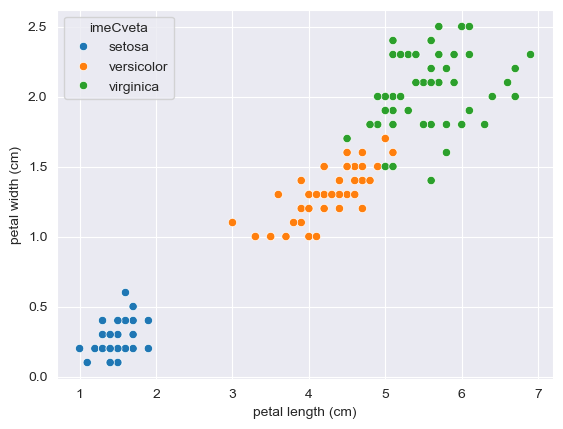

In [10]:
sns.scatterplot(x = df['petal length (cm)'], y = df['petal width (cm)'], hue = df['imeCveta'])

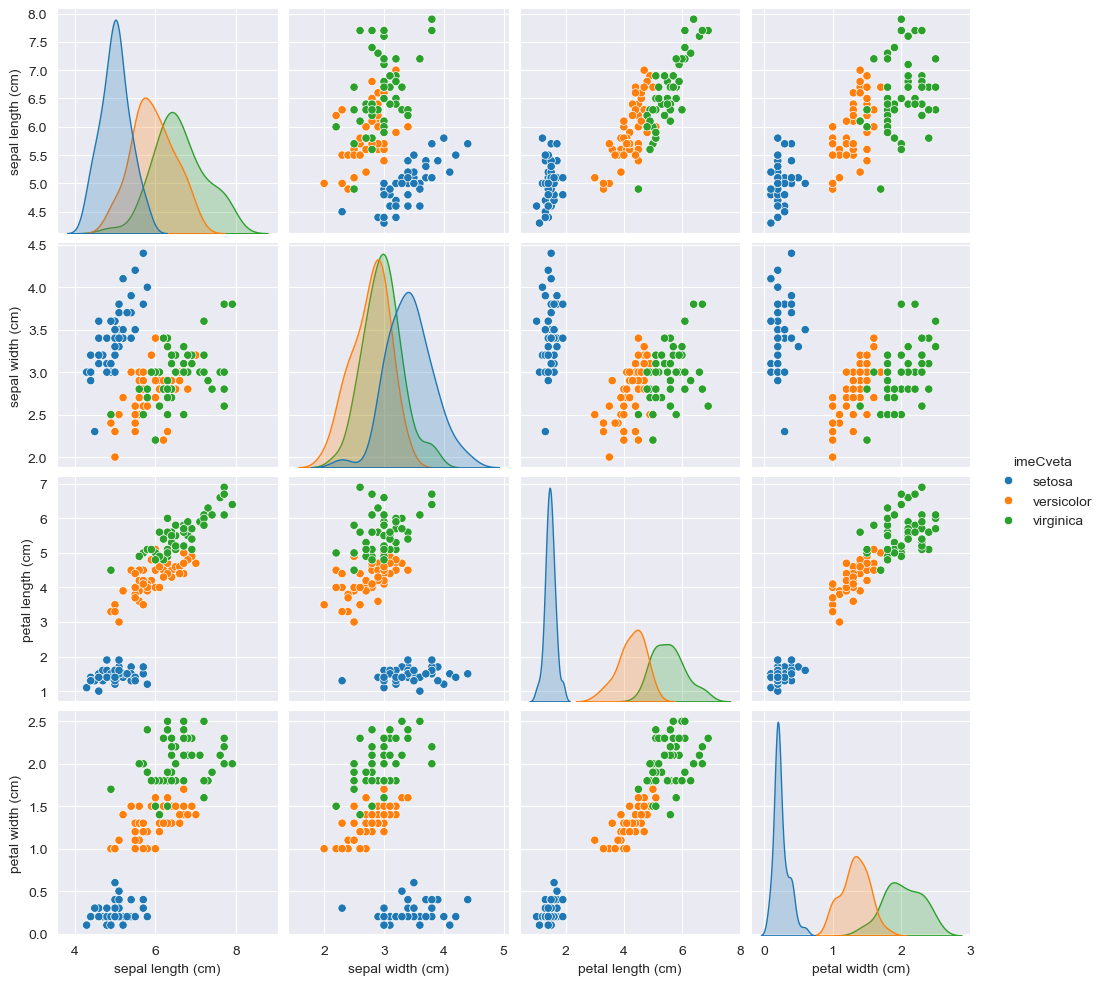

In [11]:
sns.pairplot(df.drop('cvet', axis = 1), hue = 'imeCveta')

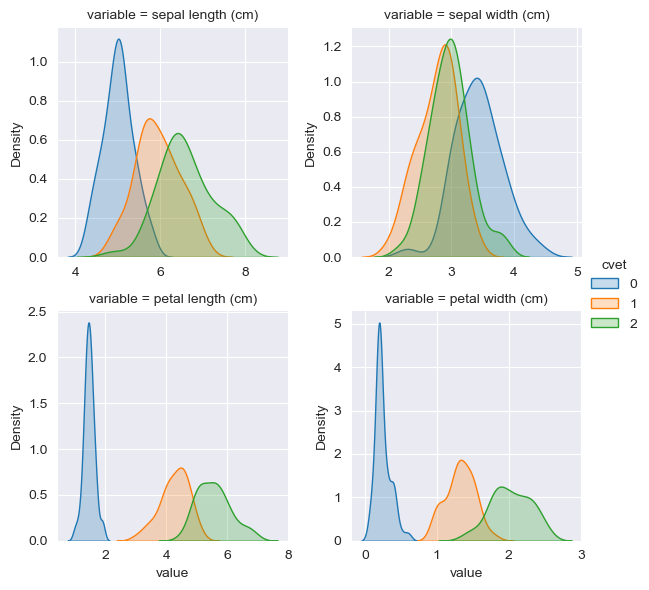

In [12]:
df_melted = df.melt(id_vars="cvet", value_vars=df.columns[:4], var_name="variable", value_name="value")

# Kreiranje FacetGrid-a sa hue da prikaže različite vrste cveća
g = sns.FacetGrid(df_melted, col="variable", hue="cvet", col_wrap=2, sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x="value", fill=True)

g.add_legend()

In [13]:
x = pd.DataFrame(iris.data[:,2:], columns = iris['feature_names'][2:])
x

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [14]:
y = pd.Series(iris['target'], name = 'cvet')
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: cvet, Length: 150, dtype: int32

In [15]:
df = pd.concat([x,y], axis = 1)
df

,petal length (cm),petal width (cm),cvet
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [57]:
def podrzaneVektorMasine(x, y, p = 0.25, c = 1, kernel = 'rbf', seed = 420, gama='scale'):
    xtr,xtest, ytr, ytest = train_test_split(x.iloc[:,0:2], y, test_size=p, random_state= seed)
    model = SVC(kernel = kernel,C = c, gamma= gama)
    model.fit(xtr,ytr)
    pred = model.predict(xtest)
    train = model.predict(xtr)
    dftest = pd.concat([xtest,ytest, pd.Series(pred, name = 'pred', index = xtest.index)], axis = 1)
    # print(confusion_matrix(ytest,pred))
    # print(f' Model je pogresio u sledecim primerima\n : {dftest[dftest['cvet'] != dftest['pred']]}')
    #sns.scatterplot(data=dftest, x = dftest.iloc[:,0], y = dftest.iloc[:,1], hue='cvet', style = 'pred', alpha = 0.6, s = 100)
    #plt.show()
    dftr = pd.concat([xtr,ytr, pd.Series(train, name = 'train', index = xtr.index)], axis = 1)
    #sns.scatterplot(data = dftr, x = dftr.iloc[:,0], y = dftr.iloc[:,1], hue = 'cvet', style = dftr['train'], alpha = 0.6, s = 100)
    #plt.show()
    x1 = x.iloc[:,0]
    x2 = x.iloc[:,1]
    x1min, x2min, x1maks, x2maks = x1.min(), x2.min(), x1.max(), x2.max()
    x1, x2 = np.meshgrid(np.linspace(x1min, x1maks, 500),
                        np.linspace(x2min, x2maks,500))
    xgrid = pd.DataFrame(np.c_[x1.ravel(), x2.ravel()], columns=x.columns[:2])

    z = model.predict(xgrid)
    z = z.reshape(x1.shape)

    plt.contourf(x1, x2, z, alpha=0.5, cmap='coolwarm')
    plt.scatter(xtr.iloc[:,0], xtr.iloc[:,1], c=ytr, cmap='coolwarm', edgecolor='k')  
    plt.xlabel("Duzina latice")
    plt.ylabel("Sirina latice")
    plt.title("Trening podaci")
    plt.show()
    
    plt.contourf(x1, x2, z, alpha=0.5, cmap='coolwarm')
    plt.scatter(xtest.iloc[:,0], xtest.iloc[:,1], c=ytest, cmap='coolwarm', edgecolor='k')  
    plt.xlabel("Duzina latice")
    plt.ylabel("Sirina latice")
    plt.title("Test podaci")
    plt.show()

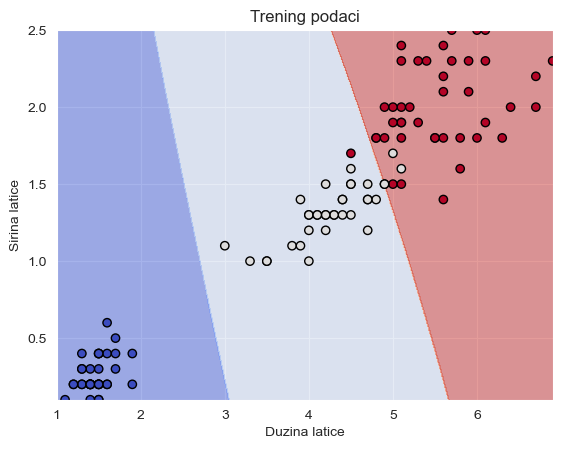

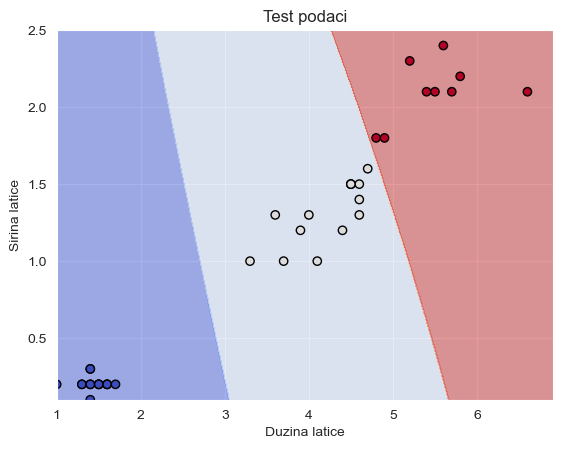

In [63]:
podrzaneVektorMasine(x,y, c = .1)

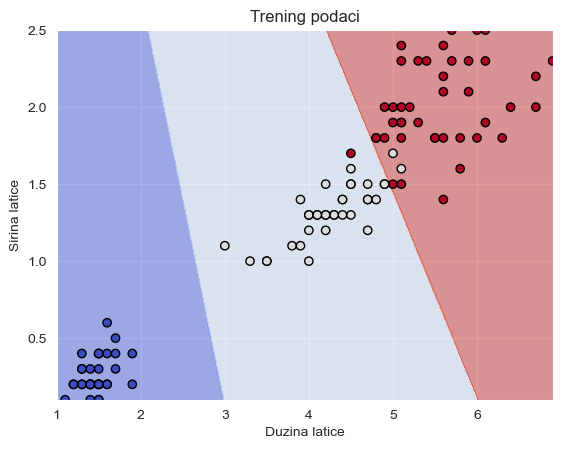

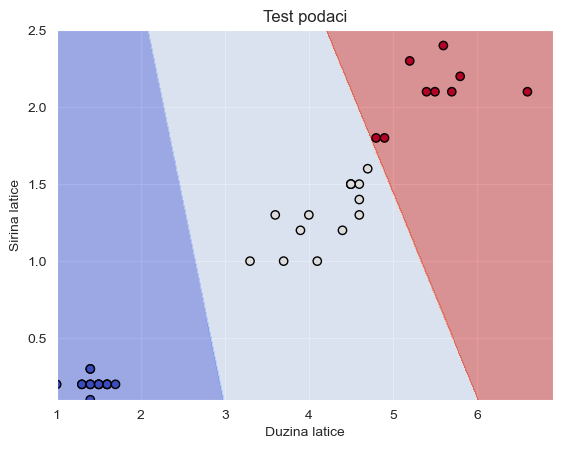

In [18]:
podrzaneVektorMasine(x,y, c = .1, kernel= 'linear')

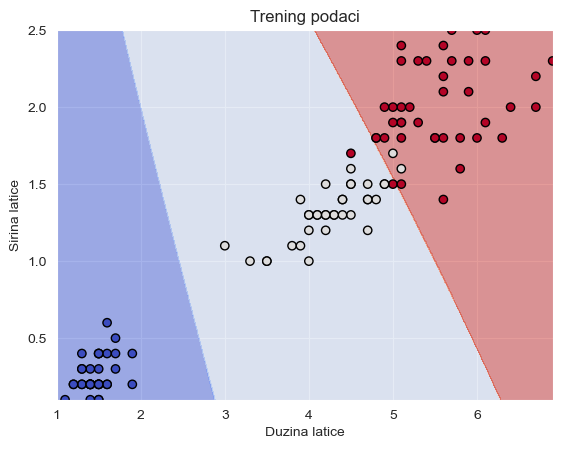

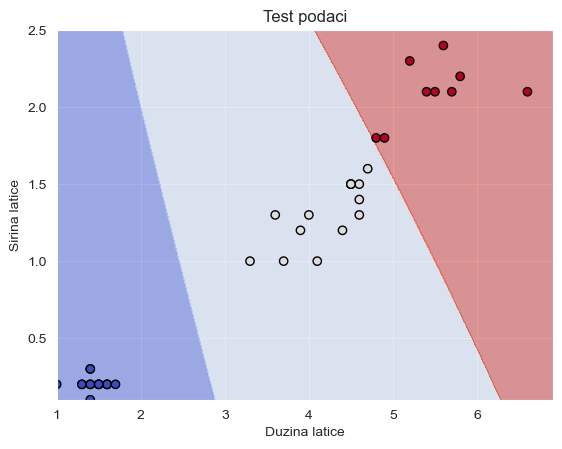

In [19]:
podrzaneVektorMasine(x,y, c =1)

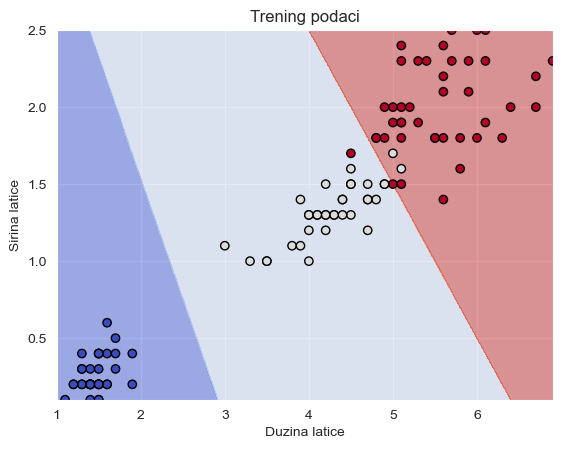

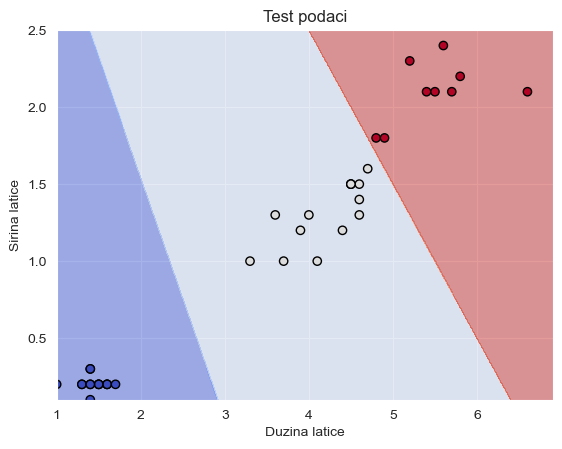

In [20]:
podrzaneVektorMasine(x,y, c =1, kernel= 'linear')

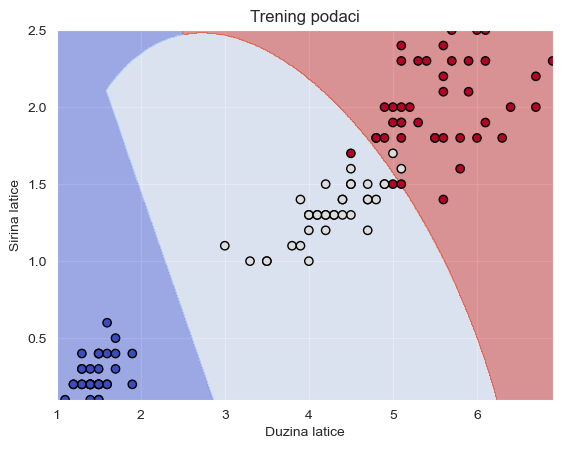

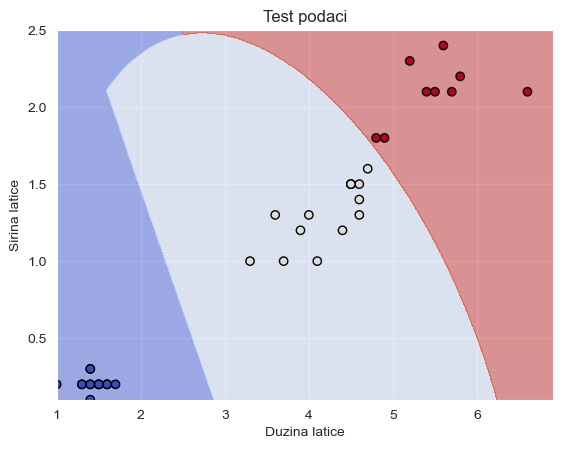

In [21]:
podrzaneVektorMasine(x,y, c =15)

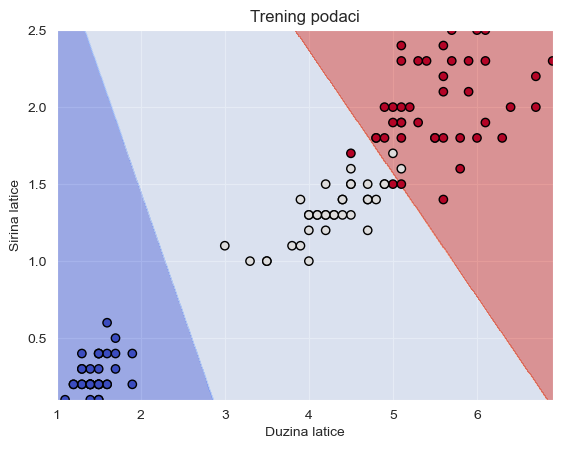

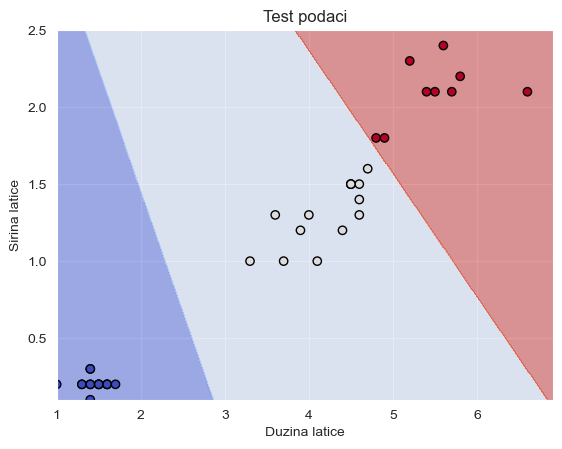

In [22]:
podrzaneVektorMasine(x,y, c =15, kernel = 'linear')

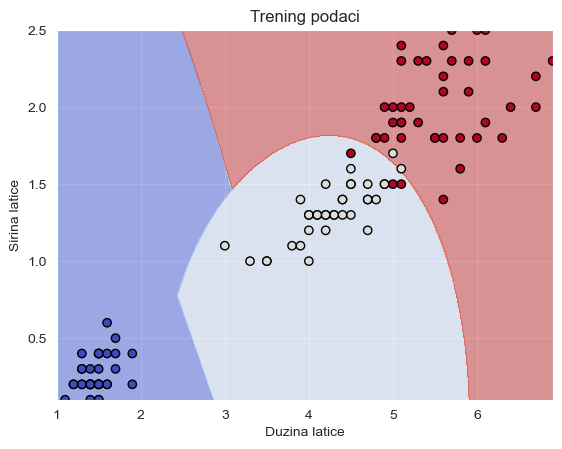

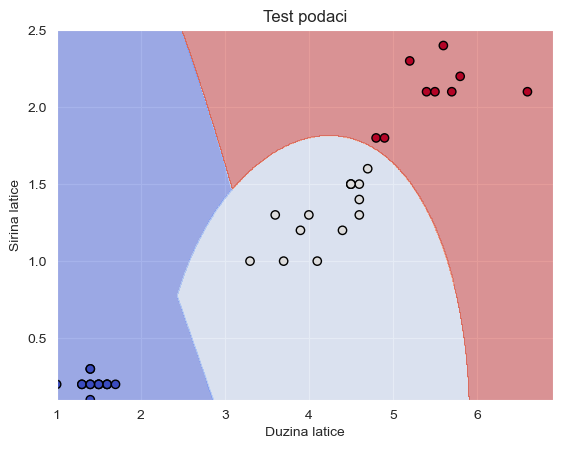

In [23]:
podrzaneVektorMasine(x,y, c = 100)

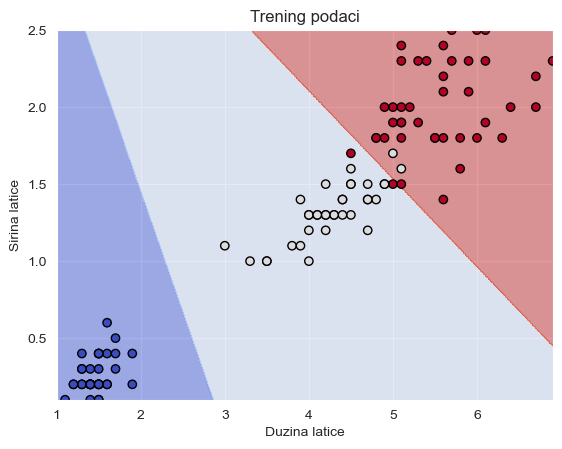

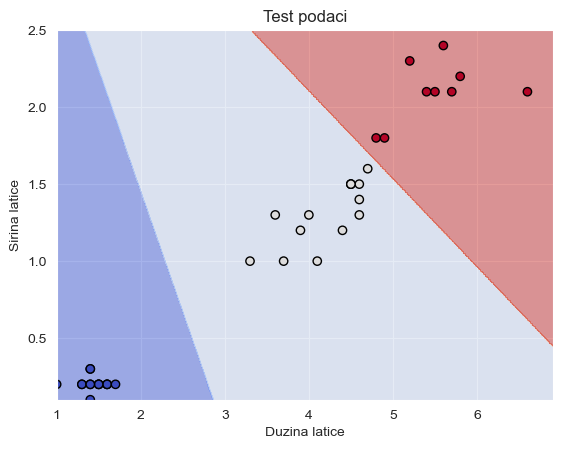

In [24]:
podrzaneVektorMasine(x,y, c = 100, kernel= 'linear')

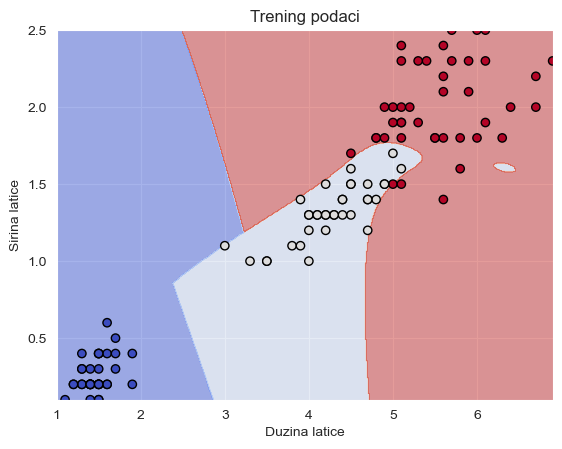

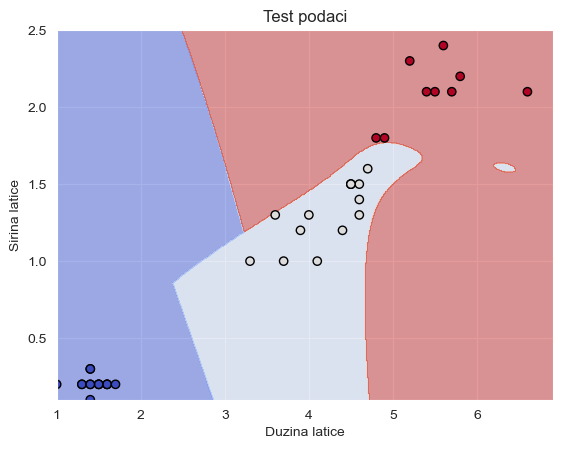

In [25]:
podrzaneVektorMasine(x,y, c = 1000000)

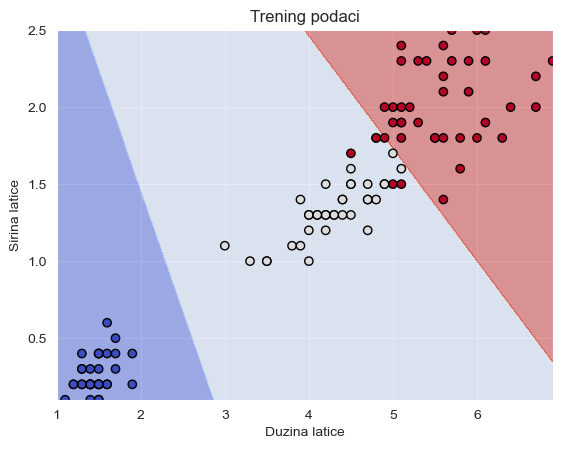

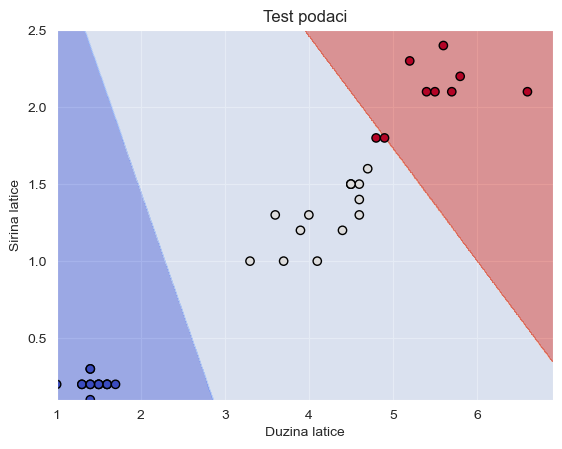

In [26]:
podrzaneVektorMasine(x,y, c = 1000000, kernel= 'linear')

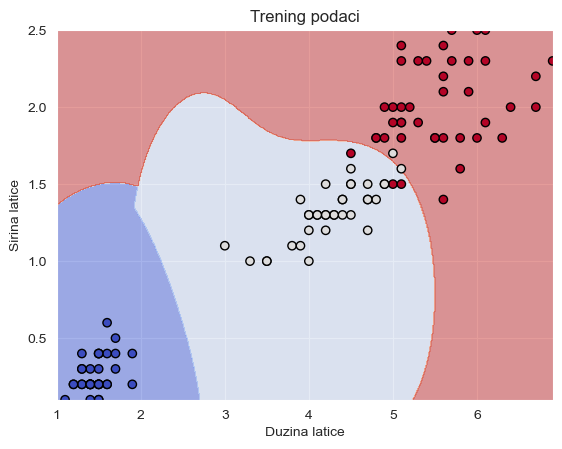

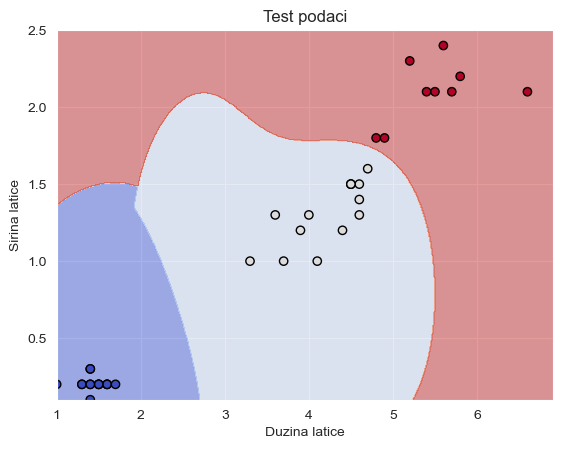

In [71]:
podrzaneVektorMasine(x,y, c = 10, gama = 1)

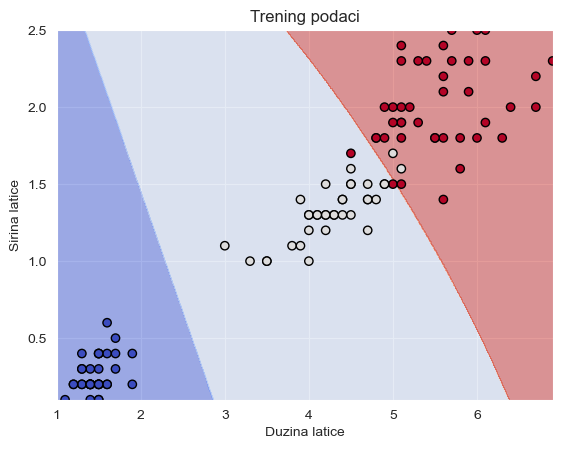

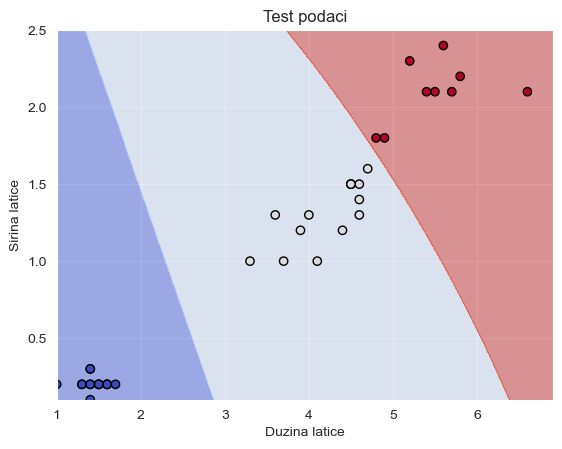

In [75]:
podrzaneVektorMasine(x,y, c = 10, gama = 0.1)

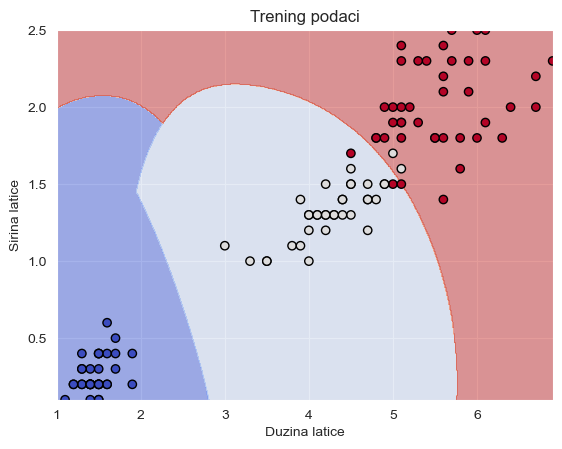

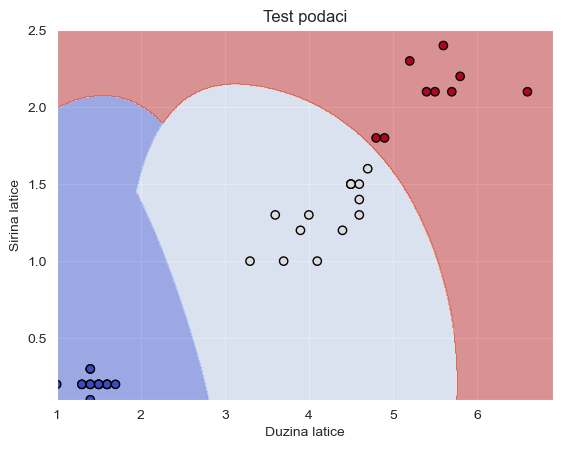

In [77]:
podrzaneVektorMasine(x,y, c = 10, gama = .5)

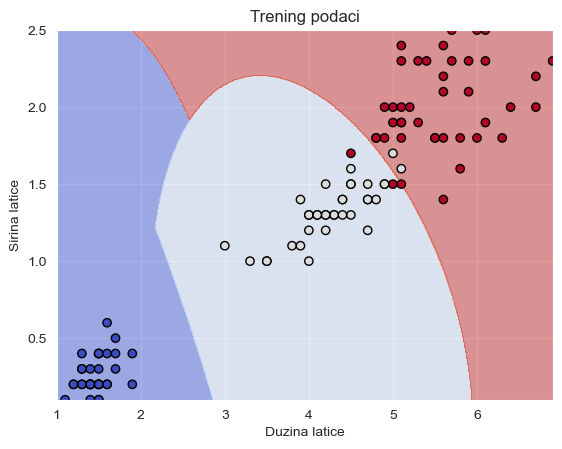

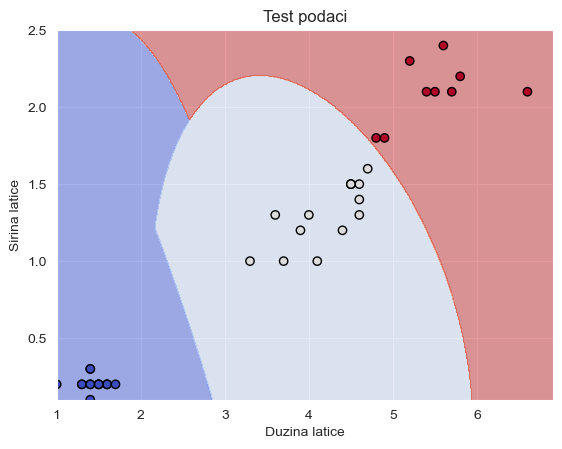

In [79]:
podrzaneVektorMasine(x,y, c = 10, gama = .3)

In [146]:
def nasumicneSume (x, y, p=0.25, n_estimators=10, max_depth=None, seed=420):
    xtr,xtest, ytr, ytest = train_test_split(x.iloc[:,0:2], y, test_size=p, random_state= seed)
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=seed)
    model.fit(xtr, ytr)
    model.fit(xtr,ytr)
    pred = model.predict(xtest)
    train = model.predict(xtr)
    dftest = pd.concat([xtest,ytest, pd.Series(pred, name = 'pred', index = xtest.index)], axis = 1)

    dftr = pd.concat([xtr,ytr, pd.Series(train, name = 'train', index = xtr.index)], axis = 1)

    x1 = x.iloc[:,0]
    x2 = x.iloc[:,1]
    x1min, x2min, x1maks, x2maks = x1.min(), x2.min(), x1.max(), x2.max()
    x1, x2 = np.meshgrid(np.linspace(x1min, x1maks, 500),
                        np.linspace(x2min, x2maks,500))
    xgrid = pd.DataFrame(np.c_[x1.ravel(), x2.ravel()], columns=x.columns[:2])

    z = model.predict(xgrid)
    z = z.reshape(x1.shape)

    plt.contourf(x1, x2, z, alpha=0.5, cmap='coolwarm')
    plt.scatter(xtr.iloc[:,0], xtr.iloc[:,1], c=ytr, cmap='coolwarm', edgecolor='k')  
    plt.xlabel("Duzina latice")
    plt.ylabel("Sirina latice")
    plt.title("Trening podaci")
    plt.show()
    
    plt.contourf(x1, x2, z, alpha=0.5, cmap='coolwarm')
    plt.scatter(xtest.iloc[:,0], xtest.iloc[:,1], c=ytest, cmap='coolwarm', edgecolor='k')  
    plt.xlabel("Duzina latice")
    plt.ylabel("Sirina latice")
    plt.title("Test podaci")
    plt.show()

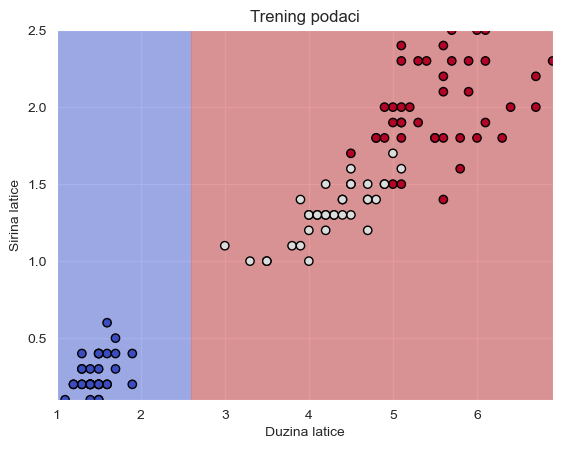

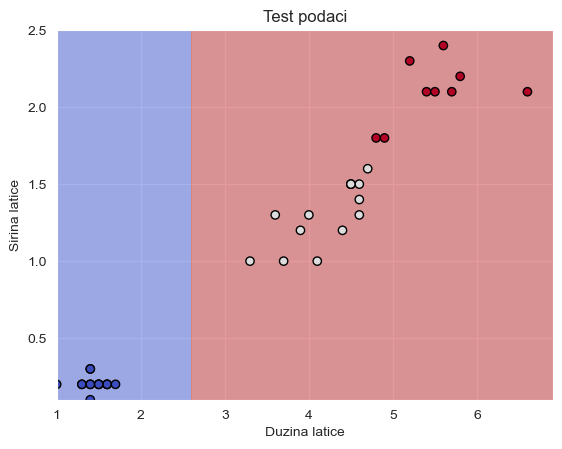

In [148]:
nasumicneSume(x,y, max_depth=1, n_estimators= 1)

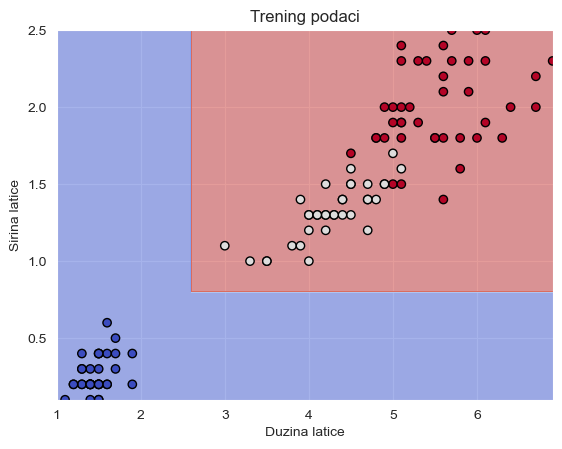

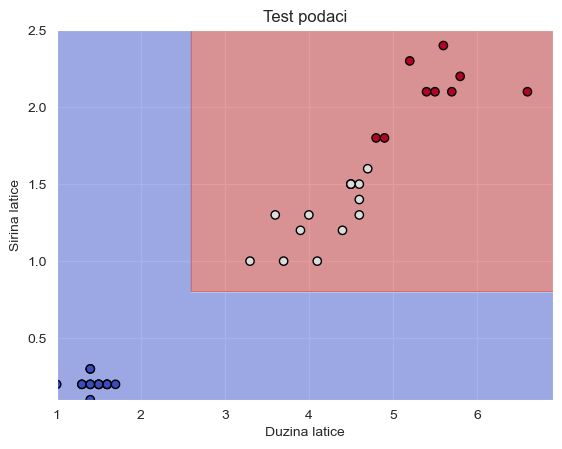

In [149]:
nasumicneSume(x,y, max_depth=1, n_estimators= 2)

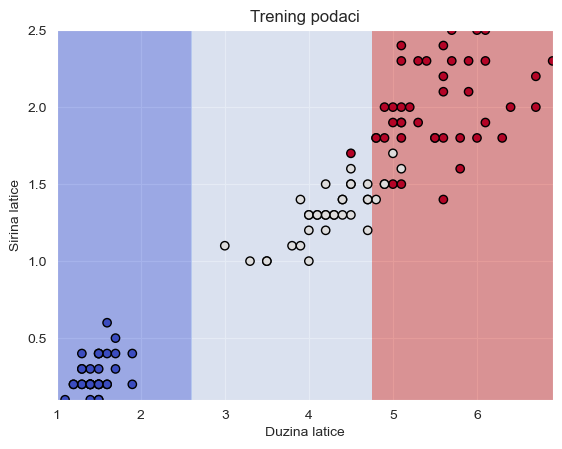

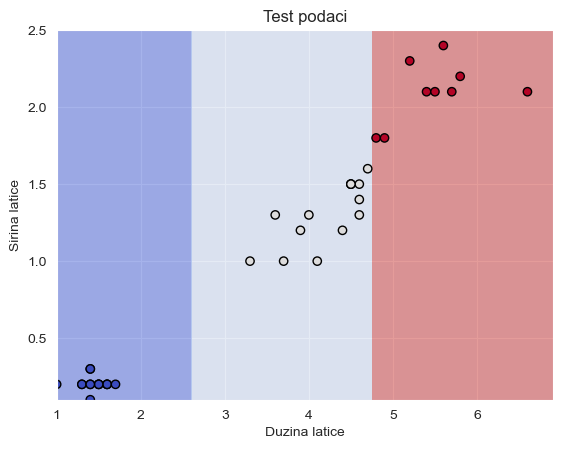

In [152]:
nasumicneSume(x,y, max_depth=2, n_estimators= 1)

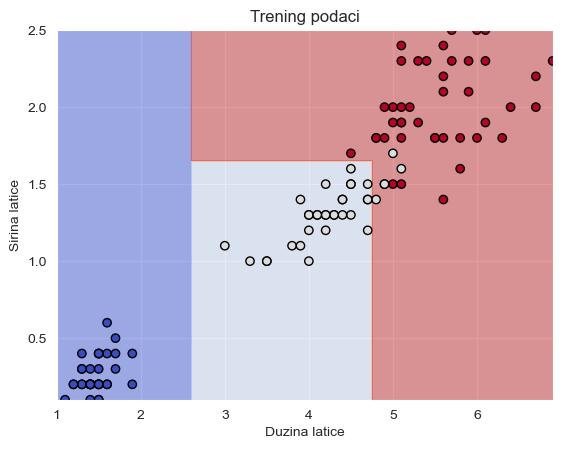

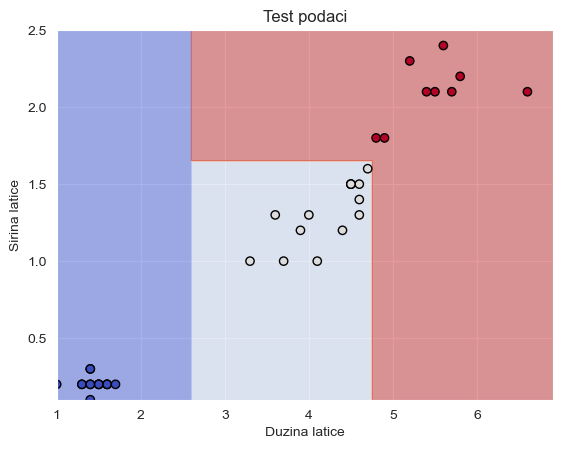

In [153]:
nasumicneSume(x,y, max_depth=3, n_estimators= 1)

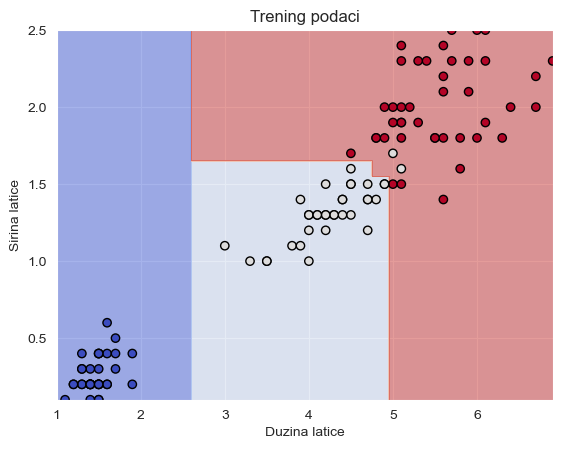

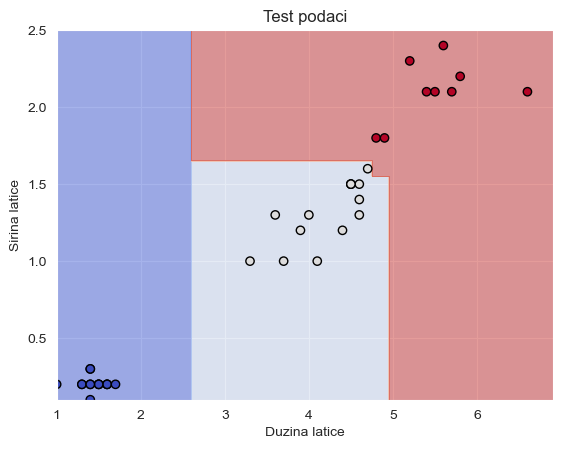

In [154]:
nasumicneSume(x,y, max_depth=4, n_estimators= 1)

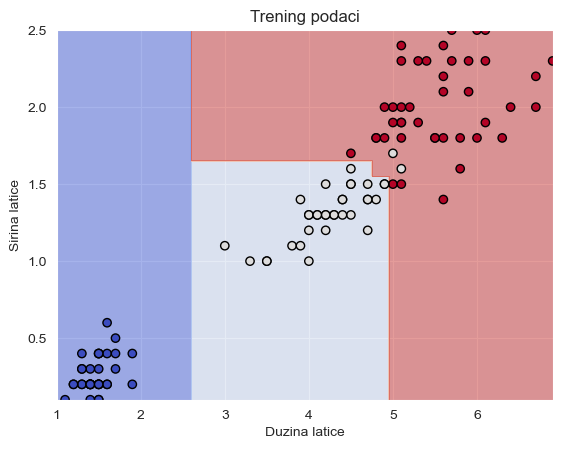

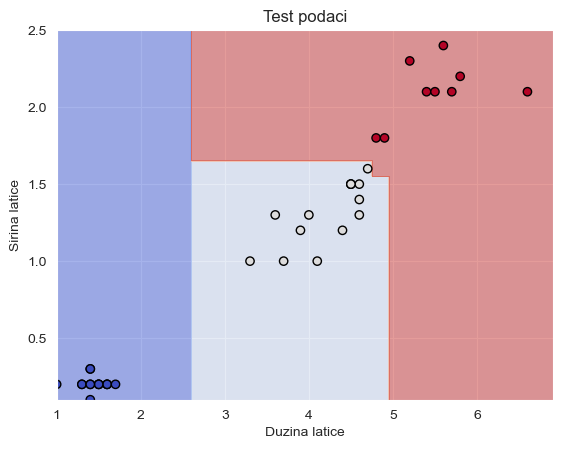

In [156]:
nasumicneSume(x,y, max_depth=6, n_estimators= 1)

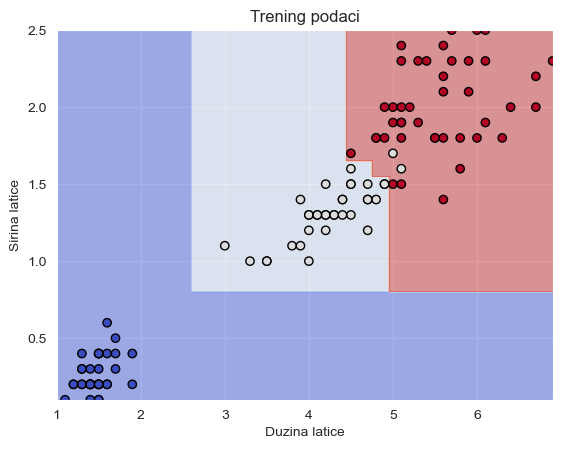

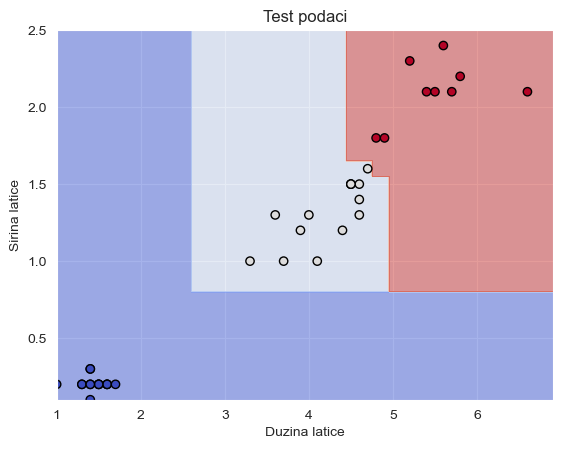

In [157]:
nasumicneSume(x,y, max_depth=3, n_estimators=2)

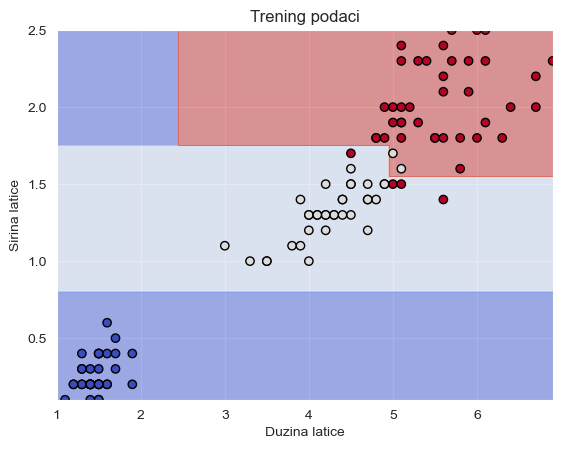

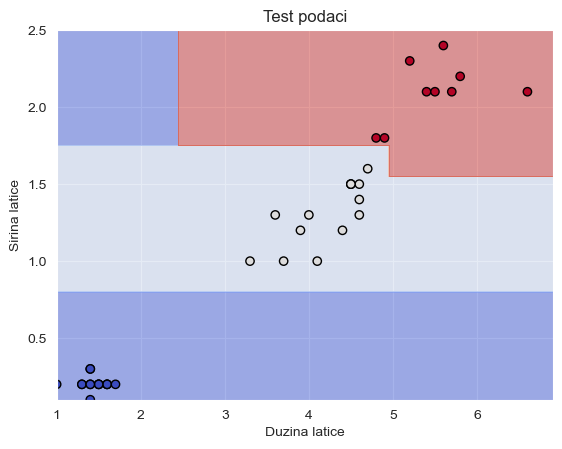

In [159]:
nasumicneSume(x,y, max_depth=3, n_estimators= 10)

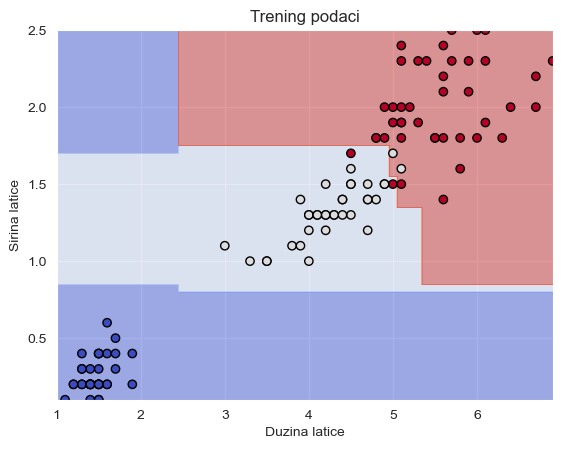

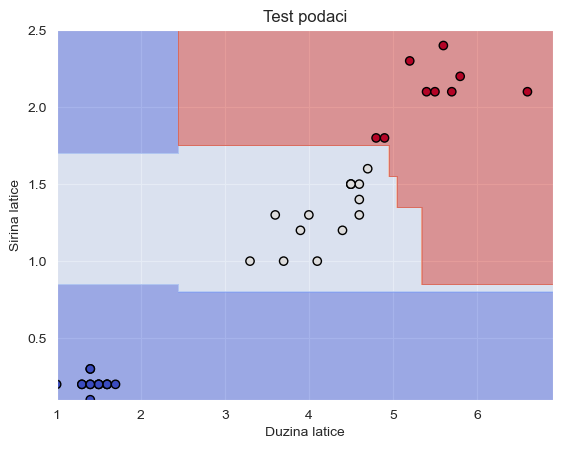

In [161]:
nasumicneSume(x,y, max_depth=3, n_estimators= 20)

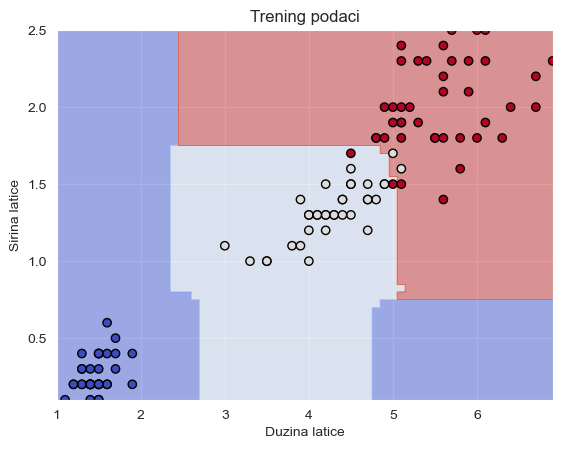

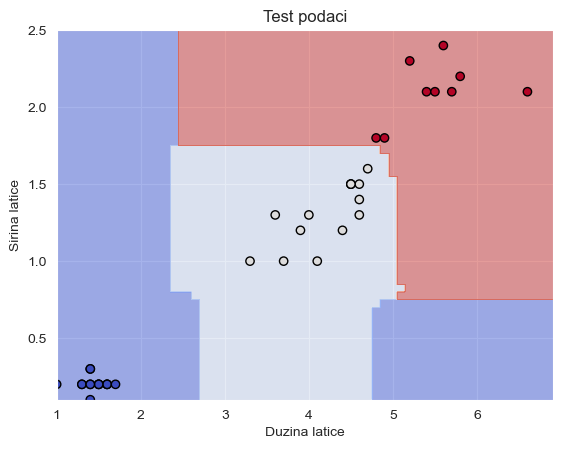

In [163]:
nasumicneSume(x,y, max_depth=3, n_estimators= 50)

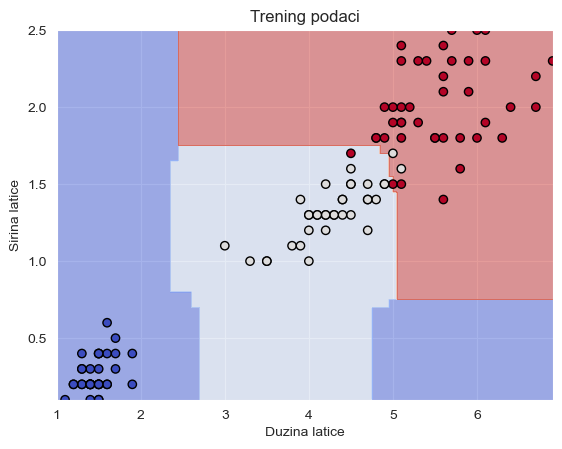

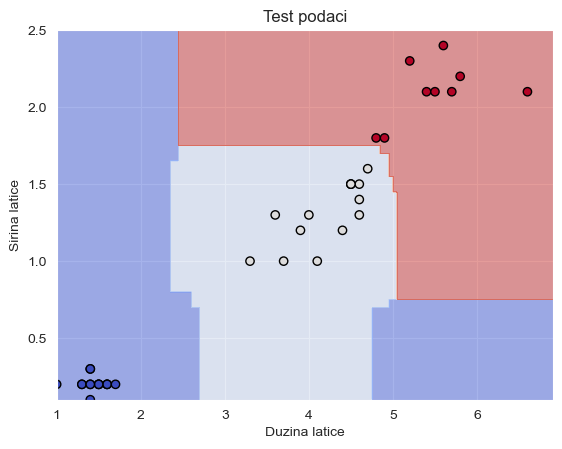

In [172]:
nasumicneSume(x,y, max_depth=3, n_estimators= 1000)

In [220]:
def logistickaRegresija (x, y, p=0.25, c = 1, maxiter = 100,solver = 'lbfgs', seed=420):
    xtr,xtest, ytr, ytest = train_test_split(x.iloc[:,0:2], y, test_size=p, random_state= seed)
    model = LogisticRegression(C = c,max_iter= maxiter, random_state=seed)
    model.fit(xtr, ytr)
    model.fit(xtr,ytr)
    pred = model.predict(xtest)
    train = model.predict(xtr)
    dftest = pd.concat([xtest,ytest, pd.Series(pred, name = 'pred', index = xtest.index)], axis = 1)

    dftr = pd.concat([xtr,ytr, pd.Series(train, name = 'train', index = xtr.index)], axis = 1)

    x1 = x.iloc[:,0]
    x2 = x.iloc[:,1]
    x1min, x2min, x1maks, x2maks = x1.min(), x2.min(), x1.max(), x2.max()
    x1, x2 = np.meshgrid(np.linspace(x1min, x1maks, 500),
                        np.linspace(x2min, x2maks,500))
    xgrid = pd.DataFrame(np.c_[x1.ravel(), x2.ravel()], columns=x.columns[:2])

    z = model.predict(xgrid)
    z = z.reshape(x1.shape)

    plt.contourf(x1, x2, z, alpha=0.5, cmap='coolwarm')
    plt.scatter(xtr.iloc[:,0], xtr.iloc[:,1], c=ytr, cmap='coolwarm', edgecolor='k')  
    plt.xlabel("Duzina latice")
    plt.ylabel("Sirina latice")
    plt.title("Trening podaci")
    plt.show()
    
    plt.contourf(x1, x2, z, alpha=0.5, cmap='coolwarm')
    plt.scatter(xtest.iloc[:,0], xtest.iloc[:,1], c=ytest, cmap='coolwarm', edgecolor='k')  
    plt.xlabel("Duzina latice")
    plt.ylabel("Sirina latice")
    plt.title("Test podaci")
    plt.show()

C:\Users\Jelena\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jelena\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

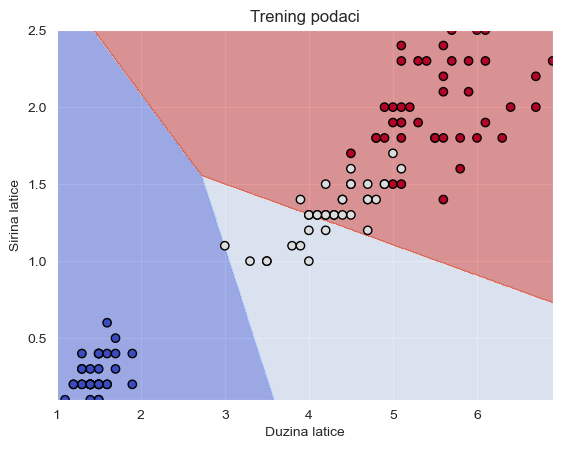

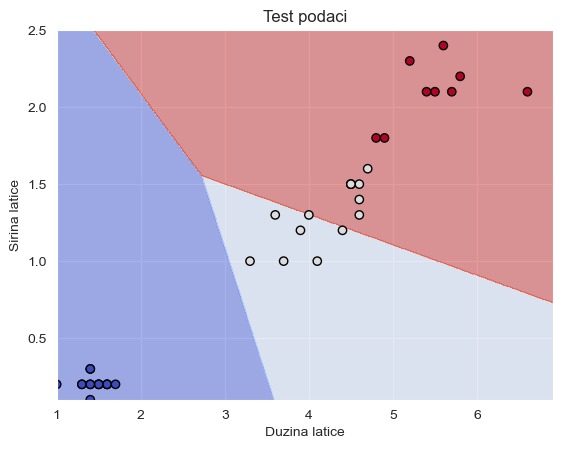

In [198]:
logistickaRegresija(x,y, c = .1, maxiter= 10)

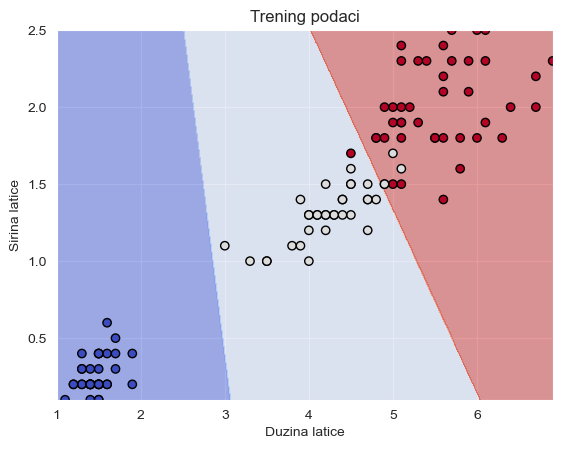

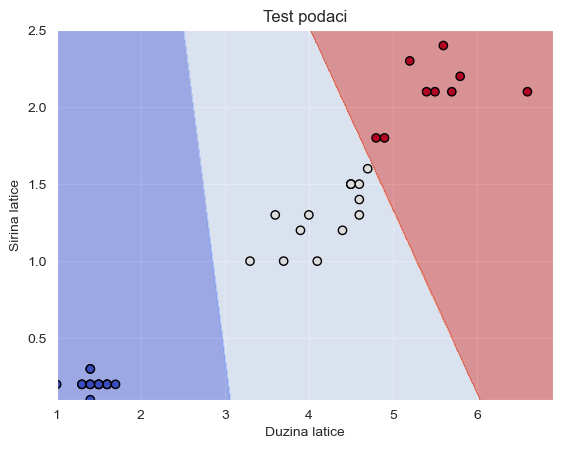

In [200]:
logistickaRegresija(x,y, c = .1)

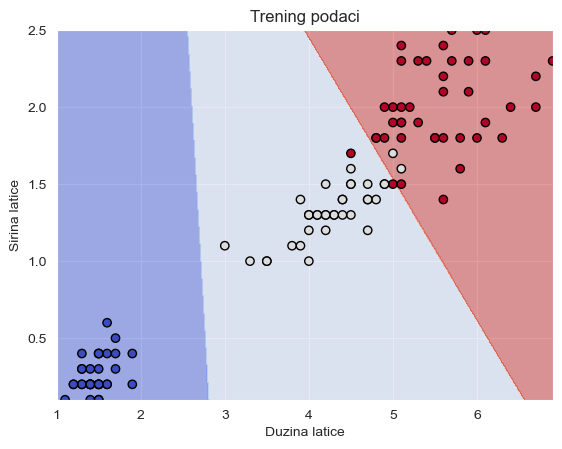

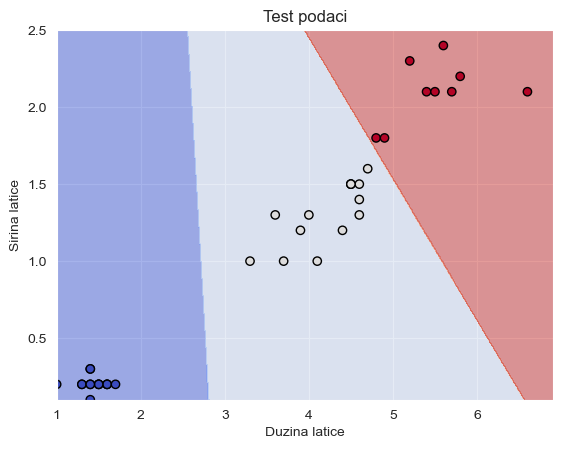

In [202]:
logistickaRegresija(x,y, c = 1)

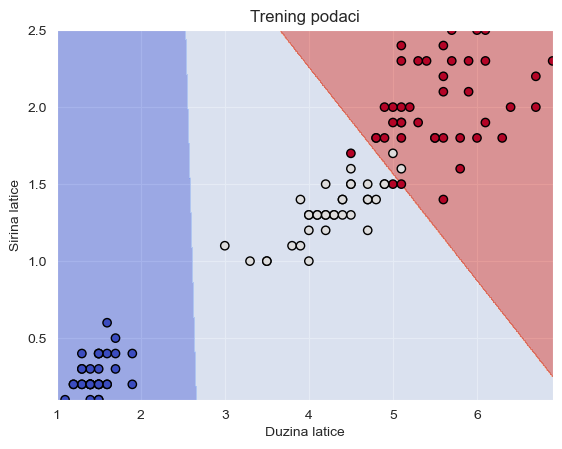

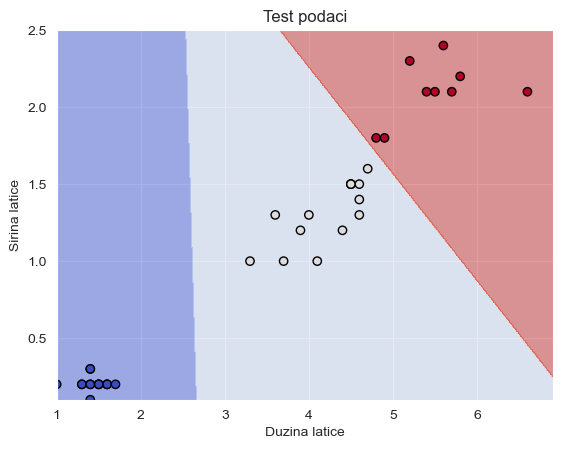

In [204]:
logistickaRegresija(x,y, c = 10)

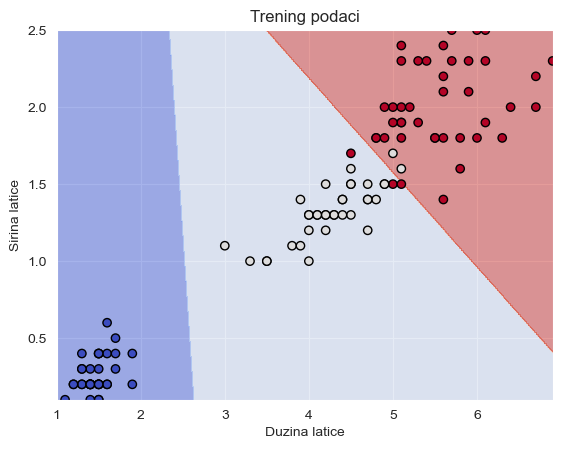

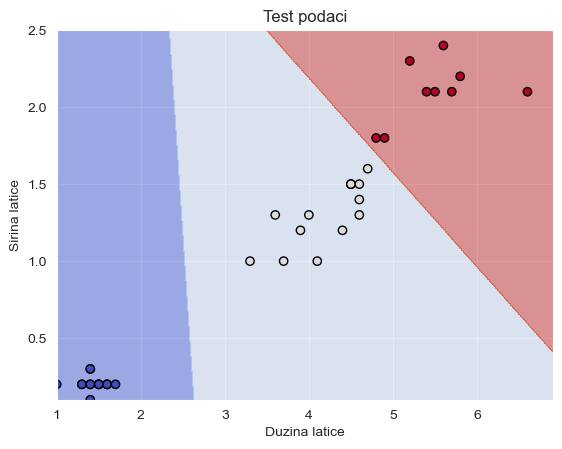

In [206]:
logistickaRegresija(x,y, c = 70)

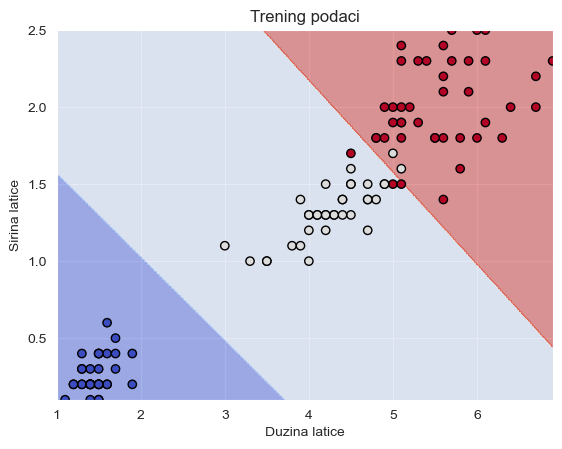

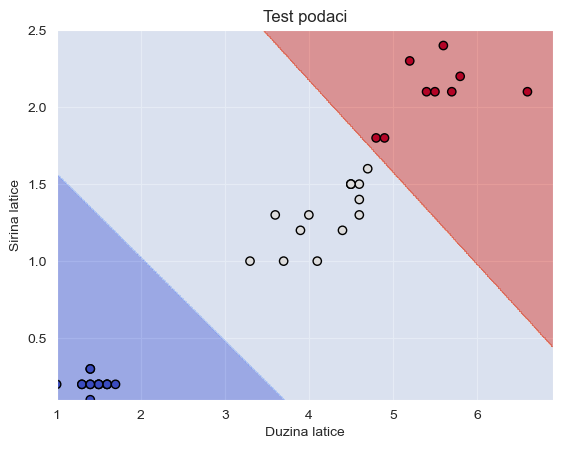

In [208]:
logistickaRegresija(x,y, c = 1000)

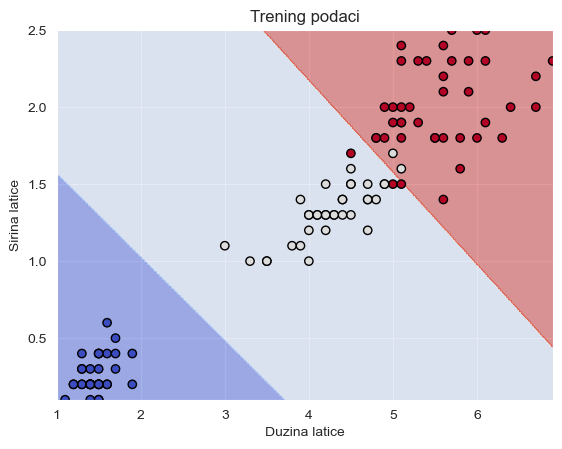

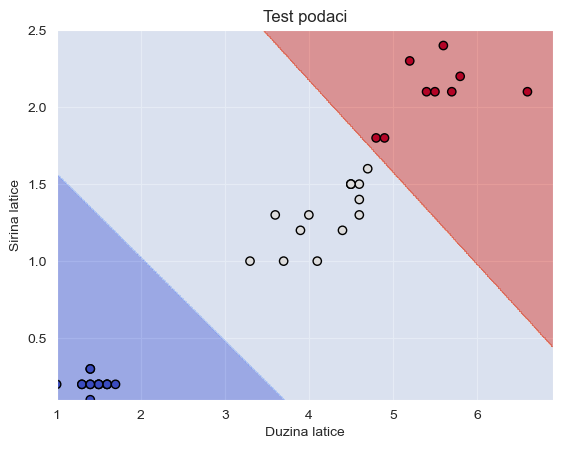

In [222]:
logistickaRegresija(x,y, c = 1000, solver = 'liblinear')